In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
# Splitting dataset into training and testing set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Printing the size of training dataset
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
# Reshapping the data for fitting into the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
# Normalizing the training and testing set.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
batch_size = 128
num_classes = 10
epochs = 10

In [8]:
# Creating the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compiing the  model by using appropriate optimizier .
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [10]:

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 62s 123ms/step - loss: 0.3940 - accuracy: 0.8772 - val_loss: 0.0640 - val_accuracy: 0.9813
Epoch 2/10
469/469 [==============================] - 56s 119ms/step - loss: 0.1163 - accuracy: 0.9696 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 3/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0805 - accuracy: 0.9791 - val_loss: 0.0366 - val_accuracy: 0.9891
Epoch 4/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0677 - accuracy: 0.9827 - val_loss: 0.0358 - val_accuracy: 0.9896
Epoch 5/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0584 - accuracy: 0.9846 - val_loss: 0.0375 - val_accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0495 - accuracy: 0.9873 - val_loss: 0.0299 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 52s 112ms/step - loss: 0.0415 - accuracy: 0.9887 - val_loss: 0.0297 - val_ac

In [11]:
# Printing the model loss and accuracy.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024770012125372887
Test accuracy: 0.992900013923645


In [12]:
# Saving the model for future use.
model.save('mnist.h')
print("Saving the model as mnist.h")

INFO:tensorflow:Assets written to: mnist.h\assets


INFO:tensorflow:Assets written to: mnist.h\assets


Saving the model as mnist.h


In [19]:
predicions=model.predict([x_test])
print(predicions)

313/313 [==============================] - 4s 13ms/step
[[4.56061636e-19 1.23741984e-14 1.84127710e-13 ... 1.00000000e+00
  7.20920629e-19 4.84209027e-12]
 [4.50456903e-12 3.65486041e-09 1.00000000e+00 ... 2.47537491e-10
  2.49874677e-10 3.22426439e-13]
 [2.20073783e-13 1.00000000e+00 9.38165587e-11 ... 1.21084014e-08
  1.85758946e-08 2.79409140e-09]
 ...
 [3.59535418e-18 2.09471831e-13 1.51574185e-15 ... 9.66137096e-14
  5.24867259e-13 1.57920232e-09]
 [7.01575410e-15 1.40249995e-16 2.43637752e-19 ... 1.87892091e-18
  7.87538368e-11 3.51150250e-12]
 [3.36406819e-13 6.78081831e-13 1.14556964e-12 ... 2.17801556e-18
  1.04948189e-10 2.17903495e-13]]


In [24]:
#predicting the values taken from the training set using the model
import numpy as np
print(np.argmax(predicions[1]))

2


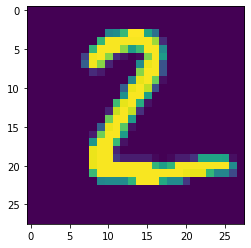

In [25]:
#image of the predicted value taken from the training set using the model
import matplotlib.pyplot as plt
plt.imshow(x_test[1])